### "Euphotic zone residence time of Antarctic Bottom Water"

### Code for Figure 4 (a and b), Figure S5 (d and e) and some unadopted but potentially useful plots
Figure 4. (a) Time series of how many days particles identified as AABW were in the euphotic zone every month and integrated PAR intensity within the euphotic zone for each month.

Figure 4. (b) The cumulative days they spent in the euphotic zone. 

Figure S5. Results from the main experiment in comparison to the ML shuffling sensitivity experiments.

Corresponding to Yinghuan Xie (yinghuan.xie@utas.edu.au)

In [21]:
# Importing the relevant modules. 
import numpy as np
import xarray as xr
import os
import re
from glob import glob
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cosima_cookbook as cc
session =cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'
from os import sys
sys.path.append('/home/581/yx9454/PhD_Ch1')
from My_Py_Func import Ch1_defs as c1d
#
import time
import datetime as dt
from datetime import timedelta
import pandas as pd

In [4]:
master_path = '/g/data/jk72/yx9454/runs/parcels/output_after_Aug/'
traj_input = {'MLS_ON':[{'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Following_MLS_ON/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Jan-Dec_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Jan-Dec_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_Loop_MLS_ON/'}],
              'MLS_OFF':[{'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Following_MLS_OFF/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Jan-Dec_MLS_OFF/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=5day)_Jan-Dec_MLS_OFF/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=5days)_Following_MLS_OFF/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=5days)_Following_Loop_MLS_OFF/'}],
              'MLS_Weak':[{'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Following_MLS_ON_middle_forw/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Jan-Dec_MLS_ON_middle_forw/'},
                          {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Jan-Dec_MLS_ON_middle_back/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_MLS_ON_middle_back/'},
                        ]
        }

## Load 5days frequency CS_Eu_date and time information

In [6]:
%%time
exp_name = 'MLS_ON'
# Load traj files 0
# From 5days freq npz file
var_in_arrs_0 = {}

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0_CS_Eu_date.npz')
var_in_arrs_0['CS_Eu_date']= npzfile['CS_Eu_date']
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_ON/var_in_arrs_0.npz')
var_in_arrs_0['timeshort'] = npzfile['time']

# Load traj files 1
# From 5days freq npz file
var_in_arrs_1 = {}

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1_CS_Eu_date.npz')
var_in_arrs_1['CS_Eu_date']= npzfile['CS_Eu_date']
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_ON/var_in_arrs_1.npz')
var_in_arrs_1['timeshort'] = npzfile['time']

# Load traj files 3
# From 5days freq npz file
var_in_arrs_3 = {}
if exp_name == 'MLS_OFF':
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_CS_Eu_date.npz')
else:
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_5days_freq_CS_Eu_date.npz')
var_in_arrs_3['CS_Eu_date']= npzfile['CS_Eu_date']
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_ON/var_in_arrs_3_5days_freq.npz')

var_in_arrs_3['timeshort'] = npzfile['time']

# Manually reset
traj_input[exp_name][3]['out_freq'] = 5

# Load traj files 2
# From 5days freq npz file
var_in_arrs_2 = {}
if exp_name == 'MLS_OFF':
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_CS_Eu_date.npz')
else:
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_5days_freq_CS_Eu_date.npz')
var_in_arrs_2['CS_Eu_date']= npzfile['CS_Eu_date']
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_ON/var_in_arrs_2_5days_freq.npz')
var_in_arrs_2['timeshort'] = npzfile['time']

# Manually reset
traj_input[exp_name][2]['out_freq'] = 5


# Load traj files 4
# From 5days freq npz file
var_in_arrs_4 = {}
if exp_name == 'MLS_OFF':
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_CS_Eu_date.npz')
else:
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_5days_freq_CS_Eu_date.npz')
var_in_arrs_4['CS_Eu_date']= npzfile['CS_Eu_date']
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/MLS_ON/var_in_arrs_4_5days_freq.npz')

var_in_arrs_4['timeshort'] = npzfile['time']

# Manually reset
traj_input[exp_name][4]['out_freq'] = 5


CPU times: user 26.4 s, sys: 24.2 s, total: 50.6 s
Wall time: 56.9 s


In [7]:
AABW_inds = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/AABW_inds.npz')['AABW_inds']

stopsign_list = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/stopsign_list_for_20yrs_150m_thre.npz')['stopsign_list']
CDW_inds = ~(np.isnan(stopsign_list))
AABW_shallower_than_EZD_plus_CDW =  (var_in_arrs_0['CS_Eu_date'][:,-1]>0) & (CDW_inds)

In [10]:
%%time
exp_name = 'MLS_OFF'
# Load traj files 0
# From 5days freq npz file
var_in_arrs_0_MLS_OFF = {}

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0_CS_Eu_date.npz')
var_in_arrs_0_MLS_OFF['CS_Eu_date']= npzfile['CS_Eu_date']

# Load traj files 1
# From 5days freq npz file
var_in_arrs_1_MLS_OFF = {}

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1_CS_Eu_date.npz')
var_in_arrs_1_MLS_OFF['CS_Eu_date']= npzfile['CS_Eu_date']

# Load traj files 3
# From 5days freq npz file
var_in_arrs_3_MLS_OFF = {}
if exp_name == 'MLS_OFF':
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_CS_Eu_date.npz')
else:
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_5days_freq_CS_Eu_date.npz')
var_in_arrs_3_MLS_OFF['CS_Eu_date']= npzfile['CS_Eu_date']

# Manually reset
traj_input[exp_name][3]['out_freq'] = 5

# Load traj files 2
# From 5days freq npz file
var_in_arrs_2_MLS_OFF = {}
if exp_name == 'MLS_OFF':
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_CS_Eu_date.npz')
else:
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_5days_freq_CS_Eu_date.npz')
var_in_arrs_2_MLS_OFF['CS_Eu_date']= npzfile['CS_Eu_date']

# Manually reset
traj_input[exp_name][2]['out_freq'] = 5


# Load traj files 4
# From 5days freq npz file
var_in_arrs_4_MLS_OFF = {}
if exp_name == 'MLS_OFF':
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_CS_Eu_date.npz')
else:
    npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_4_5days_freq_CS_Eu_date.npz')
var_in_arrs_4_MLS_OFF['CS_Eu_date']= npzfile['CS_Eu_date']

# Manually reset
traj_input[exp_name][4]['out_freq'] = 5

CPU times: user 11.7 s, sys: 905 ms, total: 12.6 s
Wall time: 13 s


In [11]:
%%time
exp_name = 'MLS_Weak'
# Load traj files 0
# From 5days freq npz file
var_in_arrs_0_MLS_Weak = {}

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_0_CS_Eu_date.npz')
var_in_arrs_0_MLS_Weak['CS_Eu_date']= npzfile['CS_Eu_date']

# Load traj files 1
# From 5days freq npz file
var_in_arrs_1_MLS_Weak = {}

npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_1_CS_Eu_date.npz')
var_in_arrs_1_MLS_Weak['CS_Eu_date']= npzfile['CS_Eu_date']

# Load traj files 3
# From 5days freq npz file
var_in_arrs_3_MLS_Weak = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_3_5days_freq_CS_Eu_date.npz')
var_in_arrs_3_MLS_Weak['CS_Eu_date']= npzfile['CS_Eu_date']

# Manually reset
traj_input[exp_name][3]['out_freq'] = 5

# Load traj files 2
# From 5days freq npz file
var_in_arrs_2_MLS_Weak = {}
npzfile = np.load('/g/data/jk72/yx9454/Euphotic_zone_research_trajectory_in_npz/'+exp_name+'/var_in_arrs_2_5days_freq_CS_Eu_date.npz')
var_in_arrs_2_MLS_Weak['CS_Eu_date']= npzfile['CS_Eu_date']

# Manually reset
traj_input[exp_name][2]['out_freq'] = 5

CPU times: user 1.63 s, sys: 1.5 s, total: 3.14 s
Wall time: 5.14 s


In [12]:
%%time
# Transform 'timeshort' to readable datetime
i=0
for var_in_arrs in [var_in_arrs_4,var_in_arrs_3,var_in_arrs_1,var_in_arrs_0]:
    seconds_array = var_in_arrs['timeshort'][100]//1000000000
    seconds_array[np.isnan(seconds_array)] = -365*86400*50
    # Convert the seconds to datetime objects
    var_in_arrs['datetime'] = np.array([dt.datetime(1970, 1, 1) + dt.timedelta(seconds=seconds) for seconds in seconds_array])
    print(i)
    i+=1

for var_in_arrs in [var_in_arrs_2]:
    seconds_array = var_in_arrs['timeshort'][-100]//1000000000
    seconds_array[np.isnan(seconds_array)] = -365*86400*50
    # Convert the seconds to datetime objects
    var_in_arrs['datetime'] = np.array([dt.datetime(1970, 1, 1) + dt.timedelta(seconds=seconds) for seconds in seconds_array])


# Manually fix the missing values
var_in_arrs_4['datetime'] = var_in_arrs_4['datetime'] - timedelta(days=32*365+8)
var_in_arrs_1['datetime'][:2] = [dt.datetime(2005,1,5,12),dt.datetime(2005,1,10,12)]
var_in_arrs_2['datetime'][:4] = [dt.datetime(2005,12,31,0),dt.datetime(2005,12,26,0),dt.datetime(2005,12,21,0),dt.datetime(2005,12,16,0)]

0
1
2
3
CPU times: user 9.04 ms, sys: 0 ns, total: 9.04 ms
Wall time: 8.61 ms


### Only execute below 2 chunks if we need MLS OFF version

In [13]:
%%time
PARZ_thre = 0.433 # Any value below this value will be set to zero
Chl_a_ver = 'Chl-a_based_on_OCCCI_v6'

files = sorted(glob('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/'+Chl_a_ver+'/var_in_arrs_*.npz'))

var_in_arrs_list = [var_in_arrs_0_MLS_OFF,var_in_arrs_1_MLS_OFF,var_in_arrs_2_MLS_OFF,var_in_arrs_3_MLS_OFF,var_in_arrs_4_MLS_OFF]
for i in [0,1,2,3,4]:
    print(files[i])
    for pvar in ['PARZ','Pt_ind']:
        PVAR   = np.load(files[i])[pvar]
        var_in_arrs_list[i][pvar]=PVAR
        print(pvar,' loaded')
        
for var_in_arrs in [var_in_arrs_0_MLS_OFF,var_in_arrs_1_MLS_OFF,var_in_arrs_2_MLS_OFF,var_in_arrs_3_MLS_OFF,var_in_arrs_4_MLS_OFF]:
    var_in_arrs['PARZ'][var_in_arrs['PARZ']<PARZ_thre] = 0

/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/Chl-a_based_on_OCCCI_v6/var_in_arrs_0_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/Chl-a_based_on_OCCCI_v6/var_in_arrs_1_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/Chl-a_based_on_OCCCI_v6/var_in_arrs_2_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/Chl-a_based_on_OCCCI_v6/var_in_arrs_3_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/Chl-a_based_on_OCCCI_v6/var_in_arrs_4_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
CPU times: user 3.12 s, sys: 2.25 s, total: 5.37 s
Wall time: 12 s


In [14]:
var_in_arrs_0_MLS_OFF['datetime'] = var_in_arrs_0['datetime']
var_in_arrs_1_MLS_OFF['datetime'] = var_in_arrs_1['datetime']
var_in_arrs_2_MLS_OFF['datetime'] = var_in_arrs_2['datetime']
var_in_arrs_3_MLS_OFF['datetime'] = var_in_arrs_3['datetime']
var_in_arrs_4_MLS_OFF['datetime'] = var_in_arrs_4['datetime'][:1315]

AABW_inds_MLS_OFF = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/AABW_inds.npz')['AABW_inds']
sum(AABW_inds)

stopsign_list = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_OFF/stopsign_list_for_20yrs_150m_thre.npz')['stopsign_list']
CDW_inds_MLS_OFF = ~(np.isnan(stopsign_list))

AABW_shallower_than_EZD_plus_CDW_MLS_OFF = ((np.sum(var_in_arrs_0_MLS_OFF['PARZ']>0.433,axis=1)+np.sum(var_in_arrs_1_MLS_OFF['PARZ']>0.433,axis=1)+np.sum(var_in_arrs_2_MLS_OFF['PARZ']>0.433,axis=1)
    +np.sum(var_in_arrs_3_MLS_OFF['PARZ']>0.433,axis=1)+np.sum(var_in_arrs_4_MLS_OFF['PARZ']>0.433,axis=1))>0) & (CDW_inds_MLS_OFF)

In [15]:
MLS_Weak_stopsign_list = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_Weak/stopsign_list_for_10yrs_150m_thre.npz')['stopsign_list']
CDW_inds_MLS_Weak = ~(np.isnan(MLS_Weak_stopsign_list))
AABW_shallower_than_EZD_plus_CDW_MLS_Weak =  (var_in_arrs_0_MLS_Weak['CS_Eu_date'][:,-1]>0) & (CDW_inds_MLS_Weak)

# Special operation
Both var_in_arrs_1 (forwards tracking) and var_in_arrs_2 (backwards tracking) is for 2005/ year 0
We need to combine these 2 datastes together for next processing 

In [16]:
# To get a correct 2005-2006 CS_Eu_date
var_in_arrs_1_2={}
actual_res1 = var_in_arrs_1['CS_Eu_date'] - var_in_arrs_2['CS_Eu_date'][:,::-1][:,-1][:,np.newaxis]
var_in_arrs_1_2['CS_Eu_date'] =  var_in_arrs_2['CS_Eu_date'][:,::-1] + actual_res1
var_in_arrs_1_2['datetime'] = var_in_arrs_1['datetime']

### Only execute below if we need MLS OFF version

In [17]:
# To get a correct 2005-2006 CS_Eu_date
var_in_arrs_1_2_MLS_OFF={}
actual_res1 = var_in_arrs_1_MLS_OFF['CS_Eu_date'] - var_in_arrs_2_MLS_OFF['CS_Eu_date'][:,::-1][:,-1][:,np.newaxis]
var_in_arrs_1_2_MLS_OFF['CS_Eu_date'] =  var_in_arrs_2_MLS_OFF['CS_Eu_date'][:,::-1] + actual_res1
var_in_arrs_1_2_MLS_OFF['datetime'] = var_in_arrs_1_MLS_OFF['datetime']

### Only execute below if we need MLS Weak version

In [19]:
# To get a correct 2005-2006 CS_Eu_date
var_in_arrs_1_2_MLS_Weak={}
actual_res1 = var_in_arrs_1_MLS_Weak['CS_Eu_date'] - var_in_arrs_2_MLS_Weak['CS_Eu_date'][:,::-1][:,-1][:,np.newaxis]
var_in_arrs_1_2_MLS_Weak['CS_Eu_date'] =  var_in_arrs_2_MLS_Weak['CS_Eu_date'][:,::-1] + actual_res1
var_in_arrs_1_2_MLS_Weak['datetime'] = var_in_arrs_1['datetime']
var_in_arrs_0_MLS_Weak['datetime'] = var_in_arrs_0['datetime']
var_in_arrs_3_MLS_Weak['datetime'] = var_in_arrs_3['datetime']

## Calculate monthly mean days in euphotic zone (based on natural month)

diff_mm*coef_prev
diff_mm*coef_late
diff_mm*coef_prev
diff_mm*coef_late
diff_mm*coef_prev
diff_mm*coef_late
diff_mm*coef_prev
diff_mm*coef_late


<Figure size 432x288 with 0 Axes>

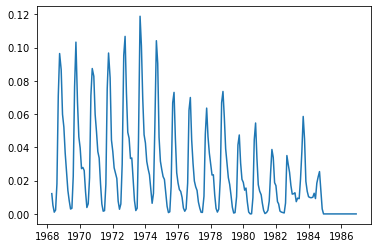

<Figure size 432x288 with 0 Axes>

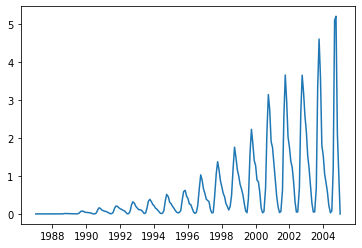

<Figure size 432x288 with 0 Axes>

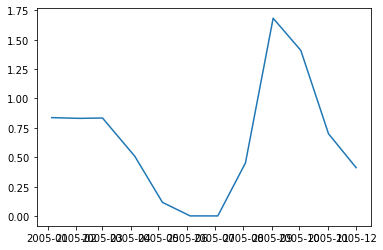

<Figure size 432x288 with 0 Axes>

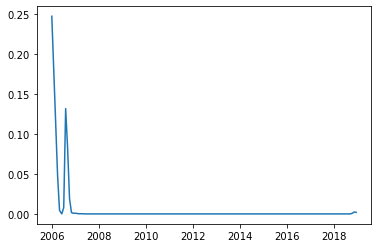

In [22]:
for var_in_arrs in [var_in_arrs_4,var_in_arrs_3]:
    # Convert the array to a pandas Series
    series = pd.Series(var_in_arrs['datetime'][::-1])
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the previous entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the first index as well
    first_indices = np.concatenate([[0], month_changes + 1])
    #-----------------------------------------------------------------------------------------------------------------------------
    # Convert the array to a pandas Series
    arr = var_in_arrs['datetime'][::-1]
    series = pd.Series(arr)
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the next entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the last index as well
    last_indices = np.concatenate([month_changes, [len(arr)-1]])
    #-----------------------------------------------------------------------------------------------------------------------------


    CS_Eu_date_Mean_arrs_CDW  = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW],axis=0)

    # Then get the difference between the first and the last slice of CS_Eu_date
    month_diff = CS_Eu_date_Mean_arrs_CDW[::-1][last_indices] - CS_Eu_date_Mean_arrs_CDW[::-1][first_indices]
    month_diff_time = var_in_arrs['datetime'][::-1][first_indices]


    # Then get the difference between the last slice and the first slice of the next month of CS_Eu_date
    diff_mm = CS_Eu_date_Mean_arrs_CDW[::-1][first_indices][1:] - CS_Eu_date_Mean_arrs_CDW[::-1][last_indices][:-1]


    from dateutil.relativedelta import relativedelta
    # Create a new array with year set to 1970
    var_in_arrs['datetime_mmdd_only']  = np.array([date + relativedelta(year=1970) for date in var_in_arrs['datetime']])

    #--------------------------------------------------------------------

    offset_previous_mm = []
    offset_previous_time = []
    for i in np.arange(var_in_arrs['datetime_mmdd_only'][::-1][last_indices][:-1].shape[0]):
        tar = var_in_arrs['datetime_mmdd_only'][::-1][last_indices][:-1][i]
        mm = tar.month
        if mm <12:
            offset_previous_mm.append((dt.datetime(1970,mm+1,1,0,0) - tar).days)
        elif mm ==12:
            offset_previous_mm.append((dt.datetime(1971,1,1,0,0) - tar).days)
        else:
            print('error')
        offset_previous_time.append(var_in_arrs['datetime_mmdd_only'][::-1][last_indices][:-1][i])
    #--------------------------------------------------------------------
    print('diff_mm*coef_prev')
    coef_prev = np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_prev)
    print('diff_mm*coef_late')
    plt.figure()
    coef_late = 1-np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_late)



    month_diff[:-1] += diff_mm*coef_prev
    month_diff[1:]  += diff_mm*coef_late

    var_in_arrs['month_diff'] = month_diff
    var_in_arrs['month_diff_time'] = month_diff_time
    # Have a look
    plt.figure()
    plt.plot(month_diff_time,month_diff)
    
for var_in_arrs in [var_in_arrs_1_2]:
    # Convert the array to a pandas Series
    series = pd.Series(var_in_arrs['datetime'])
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the previous entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the first index as well
    first_indices = np.concatenate([[0], month_changes + 1])
    #-----------------------------------------------------------------------------------------------------------------------------
    # Convert the array to a pandas Series
    arr = var_in_arrs['datetime']
    series = pd.Series(arr)
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the next entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the last index as well
    last_indices = np.concatenate([month_changes, [len(arr)-1]])
    #-----------------------------------------------------------------------------------------------------------------------------


    CS_Eu_date_Mean_arrs_CDW  = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW],axis=0)

    # Then get the difference between the first and the last slice of CS_Eu_date
    month_diff = CS_Eu_date_Mean_arrs_CDW[last_indices] - CS_Eu_date_Mean_arrs_CDW[first_indices]
    month_diff_time = var_in_arrs['datetime'][first_indices]


    # Then get the difference between the last slice and the first slice of the next month of CS_Eu_date
    diff_mm = CS_Eu_date_Mean_arrs_CDW[first_indices][1:] - CS_Eu_date_Mean_arrs_CDW[last_indices][:-1]


    from dateutil.relativedelta import relativedelta
    # Create a new array with year set to 1970
    var_in_arrs['datetime_mmdd_only']  = np.array([date + relativedelta(year=1970) for date in var_in_arrs['datetime']])

    #--------------------------------------------------------------------

    offset_previous_mm = []
    offset_previous_time = []
    for i in np.arange(var_in_arrs['datetime_mmdd_only'][last_indices][:-1].shape[0]):
        tar = var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i]
        mm = tar.month
        if mm <12:
            offset_previous_mm.append((dt.datetime(1970,mm+1,1,0,0) - tar).days)
        elif mm ==12:
            offset_previous_mm.append((dt.datetime(1971,1,1,0,0) - tar).days)
        else:
            print('error')
        offset_previous_time.append(var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i])
    #--------------------------------------------------------------------
    print('diff_mm*coef_prev')
    coef_prev = np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_prev)
    print('diff_mm*coef_late')
    plt.figure()
    coef_late = 1-np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_late)



    month_diff[:-1] += diff_mm*coef_prev
    month_diff[1:]  += diff_mm*coef_late

    var_in_arrs['month_diff'] = month_diff
    var_in_arrs['month_diff_time'] = month_diff_time
    # Have a look
    plt.figure()
    plt.plot(month_diff_time,month_diff)
    
for var_in_arrs in [var_in_arrs_0]:
    # Convert the array to a pandas Series
    series = pd.Series(var_in_arrs['datetime'])
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the previous entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the first index as well
    first_indices = np.concatenate([[0], month_changes + 1])
    #-----------------------------------------------------------------------------------------------------------------------------
    # Convert the array to a pandas Series
    arr = var_in_arrs['datetime']
    series = pd.Series(arr)
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the next entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the last index as well
    last_indices = np.concatenate([month_changes, [len(arr)-1]])
    #-----------------------------------------------------------------------------------------------------------------------------


    CS_Eu_date_Mean_arrs_CDW  = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW],axis=0)

    # Then get the difference between the first and the last slice of CS_Eu_date
    month_diff = CS_Eu_date_Mean_arrs_CDW[last_indices] - CS_Eu_date_Mean_arrs_CDW[first_indices]
    month_diff_time = var_in_arrs['datetime'][first_indices]


    # Then get the difference between the last slice and the first slice of the next month of CS_Eu_date
    diff_mm = CS_Eu_date_Mean_arrs_CDW[first_indices][1:] - CS_Eu_date_Mean_arrs_CDW[last_indices][:-1]


    from dateutil.relativedelta import relativedelta
    # Create a new array with year set to 1970
    var_in_arrs['datetime_mmdd_only']  = np.array([date + relativedelta(year=1970) for date in var_in_arrs['datetime']])

    #--------------------------------------------------------------------

    offset_previous_mm = []
    offset_previous_time = []
    for i in np.arange(var_in_arrs['datetime_mmdd_only'][last_indices][:-1].shape[0]):
        tar = var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i]
        mm = tar.month
        if mm <12:
            offset_previous_mm.append((dt.datetime(1970,mm+1,1,0,0) - tar).days)
        elif mm ==12:
            offset_previous_mm.append((dt.datetime(1971,1,1,0,0) - tar).days)
        else:
            print('error')
        offset_previous_time.append(var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i])
    #--------------------------------------------------------------------
    print('diff_mm*coef_prev')
    coef_prev = np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_prev)
    print('diff_mm*coef_late')
    plt.figure()
    coef_late = 1-np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_late)



    month_diff[:-1] += diff_mm*coef_prev
    month_diff[1:]  += diff_mm*coef_late

    var_in_arrs['month_diff'] = month_diff
    var_in_arrs['month_diff_time'] = month_diff_time
    # Have a look
    plt.figure()
    plt.plot(month_diff_time,month_diff)

### Only exectue when we need MLS OFF

diff_mm*coef_prev
diff_mm*coef_late
diff_mm*coef_prev
diff_mm*coef_late
diff_mm*coef_prev
diff_mm*coef_late
diff_mm*coef_prev
diff_mm*coef_late


<Figure size 432x288 with 0 Axes>

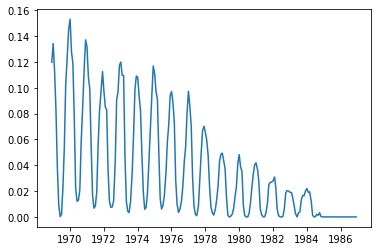

<Figure size 432x288 with 0 Axes>

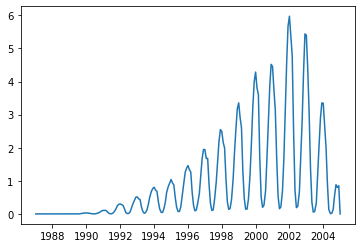

<Figure size 432x288 with 0 Axes>

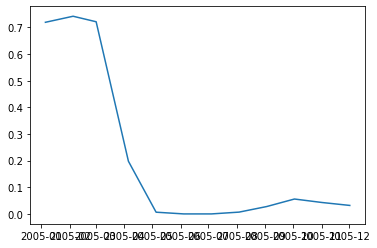

<Figure size 432x288 with 0 Axes>

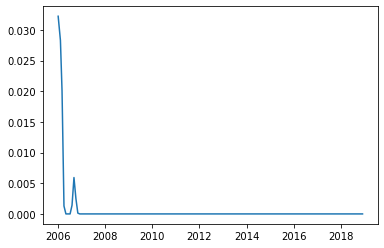

In [23]:
for var_in_arrs in [var_in_arrs_4_MLS_OFF,var_in_arrs_3_MLS_OFF]:
    # Convert the array to a pandas Series
    series = pd.Series(var_in_arrs['datetime'][::-1])
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the previous entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the first index as well
    first_indices = np.concatenate([[0], month_changes + 1])
    #-----------------------------------------------------------------------------------------------------------------------------
    # Convert the array to a pandas Series
    arr = var_in_arrs['datetime'][::-1]
    series = pd.Series(arr)
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the next entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the last index as well
    last_indices = np.concatenate([month_changes, [len(arr)-1]])
    #-----------------------------------------------------------------------------------------------------------------------------


    CS_Eu_date_Mean_arrs_CDW  = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],axis=0)

    # Then get the difference between the first and the last slice of CS_Eu_date
    month_diff = CS_Eu_date_Mean_arrs_CDW[::-1][last_indices] - CS_Eu_date_Mean_arrs_CDW[::-1][first_indices]
    month_diff_time = var_in_arrs['datetime'][::-1][first_indices]


    # Then get the difference between the last slice and the first slice of the next month of CS_Eu_date
    diff_mm = CS_Eu_date_Mean_arrs_CDW[::-1][first_indices][1:] - CS_Eu_date_Mean_arrs_CDW[::-1][last_indices][:-1]


    from dateutil.relativedelta import relativedelta
    # Create a new array with year set to 1970
    var_in_arrs['datetime_mmdd_only']  = np.array([date + relativedelta(year=1970) for date in var_in_arrs['datetime']])

    #--------------------------------------------------------------------

    offset_previous_mm = []
    offset_previous_time = []
    for i in np.arange(var_in_arrs['datetime_mmdd_only'][::-1][last_indices][:-1].shape[0]):
        tar = var_in_arrs['datetime_mmdd_only'][::-1][last_indices][:-1][i]
        mm = tar.month
        if mm <12:
            offset_previous_mm.append((dt.datetime(1970,mm+1,1,0,0) - tar).days)
        elif mm ==12:
            offset_previous_mm.append((dt.datetime(1971,1,1,0,0) - tar).days)
        else:
            print('error')
        offset_previous_time.append(var_in_arrs['datetime_mmdd_only'][::-1][last_indices][:-1][i])
    #--------------------------------------------------------------------
    print('diff_mm*coef_prev')
    coef_prev = np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_prev)
    print('diff_mm*coef_late')
    plt.figure()
    coef_late = 1-np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_late)



    month_diff[:-1] += diff_mm*coef_prev
    month_diff[1:]  += diff_mm*coef_late

    var_in_arrs['month_diff'] = month_diff
    var_in_arrs['month_diff_time'] = month_diff_time
    # Have a look
    plt.figure()
    plt.plot(month_diff_time,month_diff)
    
for var_in_arrs in [var_in_arrs_1_2_MLS_OFF]:
    # Convert the array to a pandas Series
    series = pd.Series(var_in_arrs['datetime'])
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the previous entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the first index as well
    first_indices = np.concatenate([[0], month_changes + 1])
    #-----------------------------------------------------------------------------------------------------------------------------
    # Convert the array to a pandas Series
    arr = var_in_arrs['datetime']
    series = pd.Series(arr)
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the next entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the last index as well
    last_indices = np.concatenate([month_changes, [len(arr)-1]])
    #-----------------------------------------------------------------------------------------------------------------------------


    CS_Eu_date_Mean_arrs_CDW  = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],axis=0)

    # Then get the difference between the first and the last slice of CS_Eu_date
    month_diff = CS_Eu_date_Mean_arrs_CDW[last_indices] - CS_Eu_date_Mean_arrs_CDW[first_indices]
    month_diff_time = var_in_arrs['datetime'][first_indices]


    # Then get the difference between the last slice and the first slice of the next month of CS_Eu_date
    diff_mm = CS_Eu_date_Mean_arrs_CDW[first_indices][1:] - CS_Eu_date_Mean_arrs_CDW[last_indices][:-1]


    from dateutil.relativedelta import relativedelta
    # Create a new array with year set to 1970
    var_in_arrs['datetime_mmdd_only']  = np.array([date + relativedelta(year=1970) for date in var_in_arrs['datetime']])

    #--------------------------------------------------------------------

    offset_previous_mm = []
    offset_previous_time = []
    for i in np.arange(var_in_arrs['datetime_mmdd_only'][last_indices][:-1].shape[0]):
        tar = var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i]
        mm = tar.month
        if mm <12:
            offset_previous_mm.append((dt.datetime(1970,mm+1,1,0,0) - tar).days)
        elif mm ==12:
            offset_previous_mm.append((dt.datetime(1971,1,1,0,0) - tar).days)
        else:
            print('error')
        offset_previous_time.append(var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i])
    #--------------------------------------------------------------------
    print('diff_mm*coef_prev')
    coef_prev = np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_prev)
    print('diff_mm*coef_late')
    plt.figure()
    coef_late = 1-np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_late)



    month_diff[:-1] += diff_mm*coef_prev
    month_diff[1:]  += diff_mm*coef_late

    var_in_arrs['month_diff'] = month_diff
    var_in_arrs['month_diff_time'] = month_diff_time
    # Have a look
    plt.figure()
    plt.plot(month_diff_time,month_diff)
    
for var_in_arrs in [var_in_arrs_0_MLS_OFF]:
    # Convert the array to a pandas Series
    series = pd.Series(var_in_arrs['datetime'])
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the previous entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the first index as well
    first_indices = np.concatenate([[0], month_changes + 1])
    #-----------------------------------------------------------------------------------------------------------------------------
    # Convert the array to a pandas Series
    arr = var_in_arrs['datetime']
    series = pd.Series(arr)
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the next entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the last index as well
    last_indices = np.concatenate([month_changes, [len(arr)-1]])
    #-----------------------------------------------------------------------------------------------------------------------------


    CS_Eu_date_Mean_arrs_CDW  = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_OFF],axis=0)

    # Then get the difference between the first and the last slice of CS_Eu_date
    month_diff = CS_Eu_date_Mean_arrs_CDW[last_indices] - CS_Eu_date_Mean_arrs_CDW[first_indices]
    month_diff_time = var_in_arrs['datetime'][first_indices]


    # Then get the difference between the last slice and the first slice of the next month of CS_Eu_date
    diff_mm = CS_Eu_date_Mean_arrs_CDW[first_indices][1:] - CS_Eu_date_Mean_arrs_CDW[last_indices][:-1]


    from dateutil.relativedelta import relativedelta
    # Create a new array with year set to 1970
    var_in_arrs['datetime_mmdd_only']  = np.array([date + relativedelta(year=1970) for date in var_in_arrs['datetime']])

    #--------------------------------------------------------------------

    offset_previous_mm = []
    offset_previous_time = []
    for i in np.arange(var_in_arrs['datetime_mmdd_only'][last_indices][:-1].shape[0]):
        tar = var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i]
        mm = tar.month
        if mm <12:
            offset_previous_mm.append((dt.datetime(1970,mm+1,1,0,0) - tar).days)
        elif mm ==12:
            offset_previous_mm.append((dt.datetime(1971,1,1,0,0) - tar).days)
        else:
            print('error')
        offset_previous_time.append(var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i])
    #--------------------------------------------------------------------
    print('diff_mm*coef_prev')
    coef_prev = np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_prev)
    print('diff_mm*coef_late')
    plt.figure()
    coef_late = 1-np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_late)



    month_diff[:-1] += diff_mm*coef_prev
    month_diff[1:]  += diff_mm*coef_late

    var_in_arrs['month_diff'] = month_diff
    var_in_arrs['month_diff_time'] = month_diff_time
    # Have a look
    plt.figure()
    plt.plot(month_diff_time,month_diff)

### Only exectue when we need MLS Weak

diff_mm*coef_prev
diff_mm*coef_late
diff_mm*coef_prev
diff_mm*coef_late
diff_mm*coef_prev
diff_mm*coef_late


<Figure size 432x288 with 0 Axes>

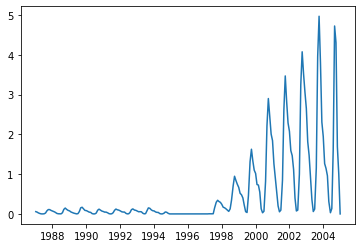

<Figure size 432x288 with 0 Axes>

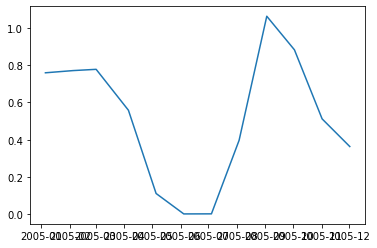

<Figure size 432x288 with 0 Axes>

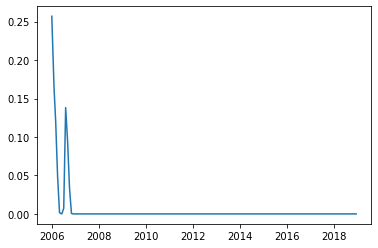

In [24]:
for var_in_arrs in [var_in_arrs_3_MLS_Weak]:
    # Convert the array to a pandas Series
    series = pd.Series(var_in_arrs['datetime'][::-1])
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the previous entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the first index as well
    first_indices = np.concatenate([[0], month_changes + 1])
    #-----------------------------------------------------------------------------------------------------------------------------
    # Convert the array to a pandas Series
    arr = var_in_arrs['datetime'][::-1]
    series = pd.Series(arr)
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the next entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the last index as well
    last_indices = np.concatenate([month_changes, [len(arr)-1]])
    #-----------------------------------------------------------------------------------------------------------------------------


    CS_Eu_date_Mean_arrs_CDW  = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_Weak],axis=0)

    # Then get the difference between the first and the last slice of CS_Eu_date
    month_diff = CS_Eu_date_Mean_arrs_CDW[::-1][last_indices] - CS_Eu_date_Mean_arrs_CDW[::-1][first_indices]
    month_diff_time = var_in_arrs['datetime'][::-1][first_indices]


    # Then get the difference between the last slice and the first slice of the next month of CS_Eu_date
    diff_mm = CS_Eu_date_Mean_arrs_CDW[::-1][first_indices][1:] - CS_Eu_date_Mean_arrs_CDW[::-1][last_indices][:-1]


    from dateutil.relativedelta import relativedelta
    # Create a new array with year set to 1970
    var_in_arrs['datetime_mmdd_only']  = np.array([date + relativedelta(year=1970) for date in var_in_arrs['datetime']])

    #--------------------------------------------------------------------

    offset_previous_mm = []
    offset_previous_time = []
    for i in np.arange(var_in_arrs['datetime_mmdd_only'][::-1][last_indices][:-1].shape[0]):
        tar = var_in_arrs['datetime_mmdd_only'][::-1][last_indices][:-1][i]
        mm = tar.month
        if mm <12:
            offset_previous_mm.append((dt.datetime(1970,mm+1,1,0,0) - tar).days)
        elif mm ==12:
            offset_previous_mm.append((dt.datetime(1971,1,1,0,0) - tar).days)
        else:
            print('error')
        offset_previous_time.append(var_in_arrs['datetime_mmdd_only'][::-1][last_indices][:-1][i])
    #--------------------------------------------------------------------
    print('diff_mm*coef_prev')
    coef_prev = np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_prev)
    print('diff_mm*coef_late')
    plt.figure()
    coef_late = 1-np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_late)



    month_diff[:-1] += diff_mm*coef_prev
    month_diff[1:]  += diff_mm*coef_late

    var_in_arrs['month_diff'] = month_diff
    var_in_arrs['month_diff_time'] = month_diff_time
    # Have a look
    plt.figure()
    plt.plot(month_diff_time,month_diff)
    
for var_in_arrs in [var_in_arrs_1_2_MLS_Weak]:
    # Convert the array to a pandas Series
    series = pd.Series(var_in_arrs['datetime'])
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the previous entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the first index as well
    first_indices = np.concatenate([[0], month_changes + 1])
    #-----------------------------------------------------------------------------------------------------------------------------
    # Convert the array to a pandas Series
    arr = var_in_arrs['datetime']
    series = pd.Series(arr)
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the next entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the last index as well
    last_indices = np.concatenate([month_changes, [len(arr)-1]])
    #-----------------------------------------------------------------------------------------------------------------------------


    CS_Eu_date_Mean_arrs_CDW  = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_Weak],axis=0)

    # Then get the difference between the first and the last slice of CS_Eu_date
    month_diff = CS_Eu_date_Mean_arrs_CDW[last_indices] - CS_Eu_date_Mean_arrs_CDW[first_indices]
    month_diff_time = var_in_arrs['datetime'][first_indices]


    # Then get the difference between the last slice and the first slice of the next month of CS_Eu_date
    diff_mm = CS_Eu_date_Mean_arrs_CDW[first_indices][1:] - CS_Eu_date_Mean_arrs_CDW[last_indices][:-1]


    from dateutil.relativedelta import relativedelta
    # Create a new array with year set to 1970
    var_in_arrs['datetime_mmdd_only']  = np.array([date + relativedelta(year=1970) for date in var_in_arrs['datetime']])

    #--------------------------------------------------------------------

    offset_previous_mm = []
    offset_previous_time = []
    for i in np.arange(var_in_arrs['datetime_mmdd_only'][last_indices][:-1].shape[0]):
        tar = var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i]
        mm = tar.month
        if mm <12:
            offset_previous_mm.append((dt.datetime(1970,mm+1,1,0,0) - tar).days)
        elif mm ==12:
            offset_previous_mm.append((dt.datetime(1971,1,1,0,0) - tar).days)
        else:
            print('error')
        offset_previous_time.append(var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i])
    #--------------------------------------------------------------------
    print('diff_mm*coef_prev')
    coef_prev = np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_prev)
    print('diff_mm*coef_late')
    plt.figure()
    coef_late = 1-np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_late)



    month_diff[:-1] += diff_mm*coef_prev
    month_diff[1:]  += diff_mm*coef_late

    var_in_arrs['month_diff'] = month_diff
    var_in_arrs['month_diff_time'] = month_diff_time
    # Have a look
    plt.figure()
    plt.plot(month_diff_time,month_diff)
    
for var_in_arrs in [var_in_arrs_0_MLS_Weak]:
    # Convert the array to a pandas Series
    series = pd.Series(var_in_arrs['datetime'])
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the previous entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the first index as well
    first_indices = np.concatenate([[0], month_changes + 1])
    #-----------------------------------------------------------------------------------------------------------------------------
    # Convert the array to a pandas Series
    arr = var_in_arrs['datetime']
    series = pd.Series(arr)
    # Convert the Series to a pandas DateTimeIndex
    index = pd.DatetimeIndex(series)
    # Get the year and month for each date
    year = index.year
    month = index.month
    # Find the indices where the month changes compared to the next entry
    month_changes = np.where(month[:-1] != month[1:])[0]
    # Include the last index as well
    last_indices = np.concatenate([month_changes, [len(arr)-1]])
    #-----------------------------------------------------------------------------------------------------------------------------


    CS_Eu_date_Mean_arrs_CDW  = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW_MLS_Weak],axis=0)

    # Then get the difference between the first and the last slice of CS_Eu_date
    month_diff = CS_Eu_date_Mean_arrs_CDW[last_indices] - CS_Eu_date_Mean_arrs_CDW[first_indices]
    month_diff_time = var_in_arrs['datetime'][first_indices]


    # Then get the difference between the last slice and the first slice of the next month of CS_Eu_date
    diff_mm = CS_Eu_date_Mean_arrs_CDW[first_indices][1:] - CS_Eu_date_Mean_arrs_CDW[last_indices][:-1]


    from dateutil.relativedelta import relativedelta
    # Create a new array with year set to 1970
    var_in_arrs['datetime_mmdd_only']  = np.array([date + relativedelta(year=1970) for date in var_in_arrs['datetime']])

    #--------------------------------------------------------------------

    offset_previous_mm = []
    offset_previous_time = []
    for i in np.arange(var_in_arrs['datetime_mmdd_only'][last_indices][:-1].shape[0]):
        tar = var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i]
        mm = tar.month
        if mm <12:
            offset_previous_mm.append((dt.datetime(1970,mm+1,1,0,0) - tar).days)
        elif mm ==12:
            offset_previous_mm.append((dt.datetime(1971,1,1,0,0) - tar).days)
        else:
            print('error')
        offset_previous_time.append(var_in_arrs['datetime_mmdd_only'][last_indices][:-1][i])
    #--------------------------------------------------------------------
    print('diff_mm*coef_prev')
    coef_prev = np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_prev)
    print('diff_mm*coef_late')
    plt.figure()
    coef_late = 1-np.array(offset_previous_mm)/5
    #plt.plot(diff_mm*coef_late)



    month_diff[:-1] += diff_mm*coef_prev
    month_diff[1:]  += diff_mm*coef_late

    var_in_arrs['month_diff'] = month_diff
    var_in_arrs['month_diff_time'] = month_diff_time
    # Have a look
    plt.figure()
    plt.plot(month_diff_time,month_diff)

# Figure S5 (d)
the monthly climatology of the number of AABW particles with residence in the euphotic zone for each month, spanning 10 years before to one year after year 0, for all three experiments.

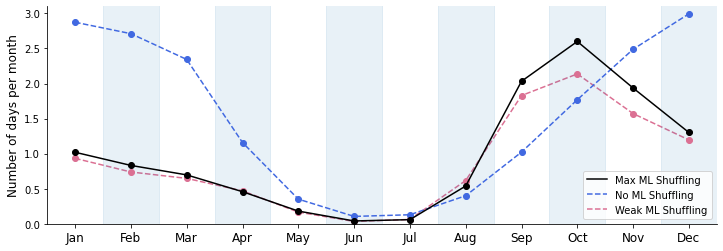

In [26]:
# For MLS ON version
# Example array with datetime values (dates)
dates = np.concatenate((var_in_arrs_3['month_diff_time'],var_in_arrs_1_2['month_diff_time']))

# Example array with corresponding observations (data)
data = np.concatenate((var_in_arrs_3['month_diff'],var_in_arrs_1_2['month_diff']))

# Create a DataFrame using the dates and data arrays
df = pd.DataFrame({'dates': dates, 'data': data})

# Filter the DataFrame based on the date range
start_date = np.datetime64('1995-01-01')
end_date = np.datetime64('2005-12-31')
filtered_df = df[(df['dates'] >= start_date) & (df['dates'] <= end_date)]

# Group the filtered observations by month and calculate the mean for each month
monthly_means = filtered_df.groupby(filtered_df['dates'].dt.month)['data'].mean()
monthly_means_MLS_ON = monthly_means

# For MLS OFF version
# Example array with datetime values (dates)
dates = np.concatenate((var_in_arrs_3_MLS_OFF['month_diff_time'],var_in_arrs_1_2_MLS_OFF['month_diff_time']))

# Example array with corresponding observations (data)
data = np.concatenate((var_in_arrs_3_MLS_OFF['month_diff'],var_in_arrs_1_2_MLS_OFF['month_diff']))

# Create a DataFrame using the dates and data arrays
df = pd.DataFrame({'dates': dates, 'data': data})

# Filter the DataFrame based on the date range
start_date = np.datetime64('1995-01-01')
end_date = np.datetime64('2005-12-31')
filtered_df = df[(df['dates'] >= start_date) & (df['dates'] <= end_date)]

# Group the filtered observations by month and calculate the mean for each month
monthly_means = filtered_df.groupby(filtered_df['dates'].dt.month)['data'].mean()

# Print the resulting monthly means
monthly_means_MLS_OFF = monthly_means

# For MLS Weak version
# Example array with datetime values (dates)
dates = np.concatenate((var_in_arrs_3_MLS_Weak['month_diff_time'],var_in_arrs_1_2_MLS_Weak['month_diff_time']))

# Example array with corresponding observations (data)
data = np.concatenate((var_in_arrs_3_MLS_Weak['month_diff'],var_in_arrs_1_2_MLS_Weak['month_diff']))

# Create a DataFrame using the dates and data arrays
df = pd.DataFrame({'dates': dates, 'data': data})

# Filter the DataFrame based on the date range
start_date = np.datetime64('1995-01-01')
end_date = np.datetime64('2005-12-31')
filtered_df = df[(df['dates'] >= start_date) & (df['dates'] <= end_date)]

# Group the filtered observations by month and calculate the mean for each month
monthly_means = filtered_df.groupby(filtered_df['dates'].dt.month)['data'].mean()

# Print the resulting monthly means
monthly_means_MLS_Weak = monthly_means

# Plotting


# Create a 3x1 subplot grid
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4), gridspec_kw={"width_ratios": [1], "height_ratios": [1],"wspace": 0.0})

# Loop over the subplots and plot the data


ax.plot(monthly_means_MLS_ON,
    'k-', label='Max ML Shuffling',zorder=3)
ax.scatter(np.arange(1,13),monthly_means_MLS_ON,
       color='k',zorder=4)
#
ax.plot(monthly_means_MLS_OFF,
    linestyle='--', label='No ML Shuffling',
       color='royalblue',zorder=1)
ax.scatter(np.arange(1,13),monthly_means_MLS_OFF,
       color='royalblue',zorder=2)
#
ax.plot(monthly_means_MLS_Weak,
    linestyle='--', label='Weak ML Shuffling',
       color='palevioletred',zorder=0)
ax.scatter(np.arange(1,13),monthly_means_MLS_Weak,
       color='palevioletred',zorder=1)

# Add labels and title
#ax.set_xlabel('Date')
ax.set_ylabel('Number of days per month',fontsize=12)  # Replace with your desired y-axis label
#ax.set_title('Timeseries Data')  # Replace with your desired title
# Set the x-axis tick positions and labels
tick_positions = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels,fontsize=12)

days_here = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
for i in [1,3,5,7,9,11]:
    ax.fill_between(days_here[i:i+2]+0.5, [0,0],[400,400], alpha=0.1,zorder=0,color='C0')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the legend
ax.legend(fontsize=10,loc='lower right')
ax.set_ylim([0,3.1])

ax.set_xlim([0.5,12.5])

# Display the plot
plt.savefig('Figure_S5_d.png',dpi=500)

# Figure S5 (e)

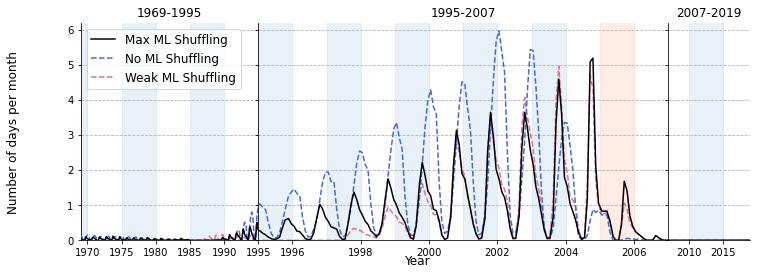

In [27]:
timeseries = np.concatenate((var_in_arrs_4['month_diff_time']+dt.timedelta(days=15),
                             var_in_arrs_3['month_diff_time'][:-1]+dt.timedelta(days=15),
                             var_in_arrs_1_2['month_diff_time']+dt.timedelta(days=15),
                             var_in_arrs_0['month_diff_time']+dt.timedelta(days=15)))
timeseries1 = np.concatenate((var_in_arrs_4_MLS_OFF['month_diff_time']+dt.timedelta(days=15),
                             var_in_arrs_3_MLS_OFF['month_diff_time'][:-1]+dt.timedelta(days=15),
                             var_in_arrs_1_2_MLS_OFF['month_diff_time']+dt.timedelta(days=15),
                             var_in_arrs_0_MLS_OFF['month_diff_time']+dt.timedelta(days=15)))

timeseries2 = np.concatenate((var_in_arrs_3_MLS_OFF['month_diff_time'][:-1]+dt.timedelta(days=15),
                             var_in_arrs_1_2_MLS_OFF['month_diff_time']+dt.timedelta(days=15),
                             var_in_arrs_0_MLS_OFF['month_diff_time']+dt.timedelta(days=15)))

# Define the x ranges for each subplot
xlims = [(dt.datetime(1969,1,1), dt.datetime(1995,1,1)), (dt.datetime(1995,1,1), dt.datetime(2007,1,1)), (dt.datetime(2007,1,1), dt.datetime(2019,1,1))]

# Create a 3x1 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), gridspec_kw={"width_ratios": [1.3,3, 0.6], "height_ratios": [1],"wspace": 0.0})

# Loop over the subplots and plot the data
ii=0
for i, ax in enumerate(axs):
    
    ax.plot(timeseries, np.concatenate((var_in_arrs_4['month_diff'][::1], var_in_arrs_3['month_diff'][::1][:-1], var_in_arrs_1_2['month_diff'][::1], var_in_arrs_0['month_diff'])),
            'k-',label='Max ML Shuffling',zorder=11)
    ax.plot(timeseries1, np.concatenate((var_in_arrs_4_MLS_OFF['month_diff'][::1], var_in_arrs_3_MLS_OFF['month_diff'][::1][:-1], var_in_arrs_1_2_MLS_OFF['month_diff'][::1], var_in_arrs_0_MLS_OFF['month_diff'])),
            '--',color='royalblue',label='No ML Shuffling',zorder=10)
    ax.plot(timeseries2, np.concatenate((var_in_arrs_3_MLS_Weak['month_diff'][::1][:-1], var_in_arrs_1_2_MLS_Weak['month_diff'][::1], var_in_arrs_0_MLS_Weak['month_diff'])),
            '--',color='palevioletred',label='Weak ML Shuffling',zorder=9)
    
    #ax.set_title(f"{xlims[i][0].year}-{xlims[i][1].year}",fontsize=12)
    
    ax.set_ylim([0,6.2])
    ax.grid(axis='y', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{xlims[i][0].year}-{xlims[i][1].year}",fontsize=12)
    if ii in [1,2]:
        ax.set_yticklabels([])
    if ii == 0:
        ax.legend(loc='upper left',fontsize=12)
    if ii ==1:
        #ax.plot([dt.datetime(2005, 1, 1),dt.datetime(2005, 1, 1)],[0,400],'-',color='orangered')
        #ax.plot([dt.datetime(2006, 1, 1),dt.datetime(2006, 1, 1)],[0,400],'-',color='orangered')
        # Plot the shaded range
        start_date,end_date = dt.datetime(1995, 1, 1),dt.datetime(2005, 1, 1)
        # Calculate the number of years between the start and end dates
        num_years = (end_date.year - start_date.year) + 1
        # Create the numpy array of dates
        dates_array = np.array([dt.datetime(year, 1, 1) for year in range(start_date.year, start_date.year + num_years, 1)], dtype='datetime64')
        for iii in [0,2,4,6,8]:
            ax.fill_between([dates_array[iii],dates_array[iii+1]], [0,0],[400,400], alpha=0.1,zorder=0,color='C0') 
        ax.fill_between([dt.datetime(2005, 1, 1),dt.datetime(2006, 1, 1)], [0,0],[400,400], alpha=0.1,zorder=0,color='orangered')
    if ii ==0:
        start_date,end_date = dt.datetime(1965, 1, 1),dt.datetime(1995, 1, 1)
        # Calculate the number of years between the start and end dates
        num_years = (end_date.year - start_date.year) + 1
        # Create the numpy array of dates
        dates_array = np.array([dt.datetime(year, 1, 1) for year in range(start_date.year, start_date.year + num_years, 5)], dtype='datetime64')
        for iii in [0,2,4]:
            ax.fill_between([dates_array[iii],dates_array[iii+1]], [0,0],[400,400], alpha=0.1,zorder=0,color='C0')
        # Generate the list of tick positions and tick labels
        tick_positions = [dt.datetime(1970,1,1),dt.datetime(1975,1,1),dt.datetime(1980,1,1),dt.datetime(1985,1,1),dt.datetime(1990,1,1),dt.datetime(1995,1,1)]
        tick_labels = [tick.strftime('%Y') for tick in tick_positions]
        # Assign the tick positions and labels to the x-axis
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)
    
    if ii==2:
        ax.fill_between([dt.datetime(2010, 1, 1),dt.datetime(2015, 1, 1)], [0,0],[400,400], alpha=0.1,zorder=0,color='C0')
        # Generate the list of tick positions and tick labels
        tick_positions = [dt.datetime(2010,1,1),dt.datetime(2015,1,1)]
        tick_labels = [tick.strftime('%Y') for tick in tick_positions]
        # Assign the tick positions and labels to the x-axis
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)
    ax.set_xlim(xlims[i])
    ii+=1
    
# Add overall title and axis labels
#fig.suptitle('Euphotic zone residence time increasing')
fig.text(0.5, 0.04, 'Year',fontsize=12)
fig.text(0.04, 0.5, 'Number of days per month', va='center', rotation='vertical',fontsize=12)
plt.savefig('Figure_S5_e.png',dpi=500)
# Adjust spacing between subplots
#fig.subplots_adjust(0.1, right=1, bottom=0.15, top=0.85, wspace=0.03)

# Figure 4 (b)
The cumulative days they spent in the euphotic zone.

In [28]:
i=0
for var_in_arrs in [var_in_arrs_0,var_in_arrs_1_2,var_in_arrs_3,var_in_arrs_4]:
    var_in_arrs['90percentile_Eup_CDW'] = np.percentile(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW], 90,axis=0)
    var_in_arrs['10percentile_Eup_CDW'] = np.percentile(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW], 10,axis=0)
    var_in_arrs['Mean_Eup_CDW']         = np.nanmean(var_in_arrs['CS_Eu_date'][AABW_shallower_than_EZD_plus_CDW],axis=0)
    print('var_in_arrs_',i,' done')
    i+=1

var_in_arrs_ 0  done
var_in_arrs_ 1  done
var_in_arrs_ 2  done
var_in_arrs_ 3  done


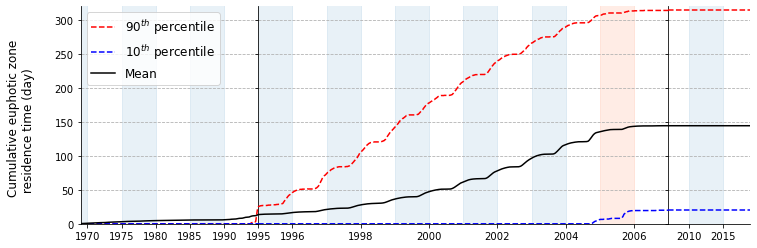

In [29]:
timeseries = np.concatenate((var_in_arrs_4['datetime'][::-1],var_in_arrs_3['datetime'][::-1],var_in_arrs_1['datetime'],var_in_arrs_0['datetime']))

# Define the x ranges for each subplot
xlims = [(dt.datetime(1969,1,1), dt.datetime(1995,1,1)), (dt.datetime(1995,1,1), dt.datetime(2007,1,1)), (dt.datetime(2007,1,1), dt.datetime(2019,1,1))]

# Create a 3x1 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), gridspec_kw={"width_ratios": [1.3,3, 0.6], "height_ratios": [1],"wspace": 0.0})

# Loop over the subplots and plot the data
ii=0
for i, ax in enumerate(axs):
    
    ax.plot(timeseries, np.concatenate((var_in_arrs_4['90percentile_Eup_CDW'][::-1], var_in_arrs_3['90percentile_Eup_CDW'][::-1], var_in_arrs_1_2['90percentile_Eup_CDW'], var_in_arrs_0['90percentile_Eup_CDW'])), 'r--',label='90$^{th}$ percentile',zorder=10)
    ax.plot(timeseries, np.concatenate((var_in_arrs_4['10percentile_Eup_CDW'][::-1], var_in_arrs_3['10percentile_Eup_CDW'][::-1], var_in_arrs_1_2['10percentile_Eup_CDW'], var_in_arrs_0['10percentile_Eup_CDW'])), 'b--',label='10$^{th}$ percentile',zorder=10)
    ax.plot(timeseries, np.concatenate((var_in_arrs_4['Mean_Eup_CDW'][::-1], var_in_arrs_3['Mean_Eup_CDW'][::-1],var_in_arrs_1_2['Mean_Eup_CDW'], var_in_arrs_0['Mean_Eup_CDW'])), 'k-',label='Mean',zorder=10)
    ax.set_xlim(xlims[i])
    #ax.set_title(f"{xlims[i][0].year}-{xlims[i][1].year}",fontsize=12)
    
    ax.set_ylim([0,320])
    if exp_name=='MLS_OFF':
        ax.set_ylim([0,525])
    ax.grid(axis='y', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if ii in [1,2]:
        ax.set_yticklabels([])
    if ii == 0:
        ax.legend(loc='upper left',fontsize=12)
    if ii ==1:
        #ax.plot([dt.datetime(2005, 1, 1),dt.datetime(2005, 1, 1)],[0,600],'-',color='orangered')
        #ax.plot([dt.datetime(2006, 1, 1),dt.datetime(2006, 1, 1)],[0,600],'-',color='orangered')
        # Plot the shaded range
        start_date,end_date = dt.datetime(1995, 1, 1),dt.datetime(2005, 1, 1)
        # Calculate the number of years between the start and end dates
        num_years = (end_date.year - start_date.year) + 1
        # Create the numpy array of dates
        dates_array = np.array([dt.datetime(year, 1, 1) for year in range(start_date.year, start_date.year + num_years, 1)], dtype='datetime64')
        for iii in [0,2,4,6,8]:
            ax.fill_between([dates_array[iii],dates_array[iii+1]], [0,0],[600,600], alpha=0.1,zorder=0,color='C0') 
        ax.fill_between([dt.datetime(2005, 1, 1),dt.datetime(2006, 1, 1)], [0,0],[600,600], alpha=0.1,zorder=0,color='orangered')
    if ii ==0:
        start_date,end_date = dt.datetime(1965, 1, 1),dt.datetime(1995, 1, 1)
        # Calculate the number of years between the start and end dates
        num_years = (end_date.year - start_date.year) + 1
        # Create the numpy array of dates
        dates_array = np.array([dt.datetime(year, 1, 1) for year in range(start_date.year, start_date.year + num_years, 5)], dtype='datetime64')
        for iii in [0,2,4]:
            ax.fill_between([dates_array[iii],dates_array[iii+1]], [0,0],[600,600], alpha=0.1,zorder=0,color='C0')
        # Generate the list of tick positions and tick labels
        tick_positions = [dt.datetime(1970,1,1),dt.datetime(1975,1,1),dt.datetime(1980,1,1),dt.datetime(1985,1,1),dt.datetime(1990,1,1),dt.datetime(1995,1,1)]
        tick_labels = [tick.strftime('%Y') for tick in tick_positions]
        # Assign the tick positions and labels to the x-axis
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)
    
    if ii==2:
        ax.fill_between([dt.datetime(2010, 1, 1),dt.datetime(2015, 1, 1)], [0,0],[600,600], alpha=0.1,zorder=0,color='C0')
        # Generate the list of tick positions and tick labels
        tick_positions = [dt.datetime(2010,1,1),dt.datetime(2015,1,1)]
        tick_labels = [tick.strftime('%Y') for tick in tick_positions]
        # Assign the tick positions and labels to the x-axis
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)
    ax.set_xlim(xlims[i])
    ii+=1
    
# Add overall title and axis labels
#fig.suptitle('Euphotic zone residence time increasing')
#fig.text(0.5, 0.04, 'Year',fontsize=12)
fig.text(0.04, 0.5, 'Cumulative euphotic zone \n residence time (day)', va='center', rotation='vertical',fontsize=12)
plt.savefig('Figure_3_cumulative_res.png',dpi=500)

# Adjust spacing between subplots
#fig.subplots_adjust(0.1, right=1, bottom=0.15, top=0.85, wspace=0.03)

# Figure 4 (a)
First we need to calculate cumulative light intensity in J/(month.m^2)

In [38]:
%%time
PARZ_thre = 0.433 # Any value below this value will be set to zero
exp_name  ='MLS_ON'
Chl_a_ver = 'Chl-a_based_on_OCCCI_v6'

files = sorted(glob('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/'+Chl_a_ver+'/var_in_arrs_*.npz'))

var_in_arrs_list = [var_in_arrs_0,var_in_arrs_1,var_in_arrs_2,var_in_arrs_3,var_in_arrs_4]
for i in [0,1,2,3,4]:
    print(files[i])
    for pvar in ['PARZ','Pt_ind']:
        PVAR   = np.load(files[i])[pvar]
        var_in_arrs_list[i][pvar]=PVAR
        print(pvar,' loaded')
            
for var_in_arrs in [var_in_arrs_0,var_in_arrs_1,var_in_arrs_2,var_in_arrs_3,var_in_arrs_4]:
    var_in_arrs['PARZ'][var_in_arrs['PARZ']<PARZ_thre] = 0

/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_0_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_1_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_2_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_3_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_4_AABW_only_PARS_Z.npz
PARZ  loaded
Pt_ind  loaded
CPU times: user 49.2 s, sys: 38.9 s, total: 1min 28s
Wall time: 1min 30s


### Then get the corresponding timeseries of 6hourly frequency 

In [39]:
for var_in_arrs in [var_in_arrs_2,var_in_arrs_3,var_in_arrs_4]:
    # Assuming your array is called 'timeseries'
    timeseries = var_in_arrs['datetime']
    # Convert the array to a pandas DataFrame
    df = pd.DataFrame({'datetime': timeseries})

    # Convert the 'datetime' column to a pandas DateTimeIndex
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)

    # Resample the DataFrame to the desired frequency (6 hourly)
    new_df = df.resample('6H').asfreq()

    # Interpolate missing values in the DataFrame
    new_df = new_df.interpolate(method='linear')

    # Convert the DataFrame back to a numpy array
    new_timeseries = new_df.index.to_numpy()

    # Print the new timeseries array
    #print(new_timeseries[::-1])
    var_in_arrs['datetime_6hrly'] = new_timeseries[::-1]
    
# Fix var_in_arrs_2['datetime_6hrly']
# Create a datetime range from January 5, 2005, to January 1, 2005, with a 6-hourly frequency
start_date = np.datetime64('2005-01-05')
end_date = np.datetime64('2004-12-31')
timeseries = np.arange(start_date, end_date, np.timedelta64(-6, 'h'))

var_in_arrs_2['datetime_6hrly'] = np.concatenate((var_in_arrs_2['datetime_6hrly'],timeseries[1:]))

### Caucluate the monthy sum for each natural month

In [43]:
if exp_name == 'MLS_ON':
    # Manually reset
    traj_input[exp_name][2]['out_freq'] = 0.25
    traj_input[exp_name][3]['out_freq'] = 0.25
    traj_input[exp_name][4]['out_freq'] = 0.25

    i=0
    for var_in_arrs in [var_in_arrs_0,var_in_arrs_1,var_in_arrs_2,var_in_arrs_3,var_in_arrs_4]:
        var_in_arrs['monthly_sum_J_per_msq'] = []
        var_in_arrs['monthly_sum_J_per_msq_time'] = []
        # var_in_arrs['monthly_sum_J_per_msq_no'] = []

        # Example array with dates
        if var_in_arrs in [var_in_arrs_1,var_in_arrs_0]:
            dates = var_in_arrs['datetime']
        else:
            dates = var_in_arrs['datetime_6hrly']

        # Extract unique year and month combinations
        year_month = np.unique(dates.astype('datetime64[M]'))

        # Convert year_month to the desired format [[yyyy, mm], [yyyy, mm], ...]
        time_series = [[int(str(ym)[:4]), int(str(ym)[5:7])] for ym in year_month]
        weight = traj_input[exp_name][i]['out_freq']*86400 #(out_freq in seconds)
        for [yyyy,mm] in time_series:
            # Specify the month and year you want to filter for
            selected_month = mm  # For May (numeric representation)
            selected_year = yyyy
            # Extract the year and month from the dates
            years = dates.astype('datetime64[Y]').astype(int) + 1970
            months = dates.astype('datetime64[M]').astype(int) % 12 + 1
            # Find the indices where the year and month match the selected year and month
            indices = np.where((years == selected_year) & (months == selected_month))[0]


            var_in_arrs['monthly_sum_J_per_msq'].append(np.nansum(var_in_arrs['PARZ'][:,indices],axis=1)*weight)
            # var_in_arrs['monthly_sum_J_per_msq_no'].append(np.arange(94123)) #Just to verify
            var_in_arrs['monthly_sum_J_per_msq_time'].append(dt.datetime(yyyy,mm,15,0,0))
            #print([yyyy,mm],' done/ Weight: ',weight,'sec')
        i+=1

        var_in_arrs['monthly_sum_J_per_msq'] = np.array(var_in_arrs['monthly_sum_J_per_msq']).T
        var_in_arrs['monthly_sum_J_per_msq_time'] = np.array(var_in_arrs['monthly_sum_J_per_msq_time'])
    

In [45]:

var_in_arrs_1_2['monthly_sum_J_per_msq_time'] = var_in_arrs_1['monthly_sum_J_per_msq_time']
if exp_name == 'MLS_OFF':
    var_in_arrs_1_2['monthly_sum_J_per_msq']      = var_in_arrs_1['monthly_sum_J_per_msq']+var_in_arrs_2['monthly_sum_J_per_msq']
elif exp_name == 'MLS_ON':
    var_in_arrs_1_2['monthly_sum_J_per_msq']      = var_in_arrs_1['monthly_sum_J_per_msq']+var_in_arrs_2['monthly_sum_J_per_msq'][:,1:]

In [47]:
i=0
for var_in_arrs in [var_in_arrs_0,var_in_arrs_1_2,var_in_arrs_3,var_in_arrs_4]:
    var_in_arrs['90percentile_Eup_CDW_monthly_sum_J'] = np.percentile(var_in_arrs['monthly_sum_J_per_msq'][AABW_shallower_than_EZD_plus_CDW], 90,axis=0)
    var_in_arrs['10percentile_Eup_CDW_monthly_sum_J'] = np.percentile(var_in_arrs['monthly_sum_J_per_msq'][AABW_shallower_than_EZD_plus_CDW], 10,axis=0)
    var_in_arrs['Mean_Eup_CDW_monthly_sum_J']         = np.nanmean(var_in_arrs['monthly_sum_J_per_msq'][AABW_shallower_than_EZD_plus_CDW],axis=0)
    print('var_in_arrs_',i,' done')
    i+=1

var_in_arrs_ 0  done
var_in_arrs_ 1  done
var_in_arrs_ 2  done
var_in_arrs_ 3  done


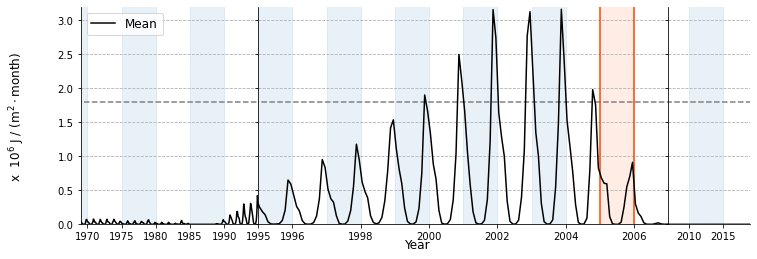

In [48]:
timeseries = np.concatenate((var_in_arrs_4['monthly_sum_J_per_msq_time'],
                             var_in_arrs_3['monthly_sum_J_per_msq_time'][:-1],
                             var_in_arrs_1_2['monthly_sum_J_per_msq_time'],
                             var_in_arrs_0['monthly_sum_J_per_msq_time']))

# Define the x ranges for each subplot
xlims = [(dt.datetime(1969,1,1), dt.datetime(1995,1,1)), (dt.datetime(1995,1,1), dt.datetime(2007,1,1)), (dt.datetime(2007,1,1), dt.datetime(2019,1,1))]

# Create a 3x1 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), gridspec_kw={"width_ratios": [1.3,3, 0.6], "height_ratios": [1],"wspace": 0.0})

# Loop over the subplots and plot the data
ii=0
for i, ax in enumerate(axs):
    
    ax.plot(timeseries, (1/1000000)*np.concatenate((var_in_arrs_4['Mean_Eup_CDW_monthly_sum_J'][::1], var_in_arrs_3['Mean_Eup_CDW_monthly_sum_J'][::1][:-1], var_in_arrs_1_2['Mean_Eup_CDW_monthly_sum_J'][::1], var_in_arrs_0['Mean_Eup_CDW_monthly_sum_J'])), 'k-',label='Mean',zorder=10)
    ax.plot([timeseries[0],timeseries[-1]],[1.8,1.8],'--',color='grey')
    ax.plot([timeseries[0],timeseries[-1]],[3.6,3.6],'--',color='grey')
    #ax.set_title(f"{xlims[i][0].year}-{xlims[i][1].year}",fontsize=12)
    
    ax.set_ylim([0,3.2])
    ax.grid(axis='y', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if ii in [1,2]:
        ax.set_yticklabels([])
    if ii == 0:
        ax.legend(loc='upper left',fontsize=12)
    if ii ==1:
        ax.plot([dt.datetime(2005, 1, 1),dt.datetime(2005, 1, 1)],[0,15.000000],'-',color='orangered')
        ax.plot([dt.datetime(2006, 1, 1),dt.datetime(2006, 1, 1)],[0,15.000000],'-',color='orangered')
        # Plot the shaded range
        start_date,end_date = dt.datetime(1995, 1, 1),dt.datetime(2005, 1, 1)
        # Calculate the number of years between the start and end dates
        num_years = (end_date.year - start_date.year) + 1
        # Create the numpy array of dates
        dates_array = np.array([dt.datetime(year, 1, 1) for year in range(start_date.year, start_date.year + num_years, 1)], dtype='datetime64')
        for iii in [0,2,4,6,8]:
            ax.fill_between([dates_array[iii],dates_array[iii+1]], [0,0],[15.000000,15.000000], alpha=0.1,zorder=0,color='C0') 
        ax.fill_between([dt.datetime(2005, 1, 1),dt.datetime(2006, 1, 1)], [0,0],[15.000000,15.000000], alpha=0.1,zorder=0,color='orangered')
    if ii ==0:
        start_date,end_date = dt.datetime(1965, 1, 1),dt.datetime(1995, 1, 1)
        # Calculate the number of years between the start and end dates
        num_years = (end_date.year - start_date.year) + 1
        # Create the numpy array of dates
        dates_array = np.array([dt.datetime(year, 1, 1) for year in range(start_date.year, start_date.year + num_years, 5)], dtype='datetime64')
        for iii in [0,2,4]:
            ax.fill_between([dates_array[iii],dates_array[iii+1]], [0,0],[15.000000,15.000000], alpha=0.1,zorder=0,color='C0')
        # Generate the list of tick positions and tick labels
        tick_positions = [dt.datetime(1970,1,1),dt.datetime(1975,1,1),dt.datetime(1980,1,1),dt.datetime(1985,1,1),dt.datetime(1990,1,1),dt.datetime(1995,1,1)]
        tick_labels = [tick.strftime('%Y') for tick in tick_positions]
        # Assign the tick positions and labels to the x-axis
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)
    
    if ii==2:
        ax.fill_between([dt.datetime(2010, 1, 1),dt.datetime(2015, 1, 1)], [0,0],[15.000000,15.000000], alpha=0.1,zorder=0,color='C0')
        # Generate the list of tick positions and tick labels
        tick_positions = [dt.datetime(2010,1,1),dt.datetime(2015,1,1)]
        tick_labels = [tick.strftime('%Y') for tick in tick_positions]
        # Assign the tick positions and labels to the x-axis
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)
    ax.set_xlim(xlims[i])
    ii+=1
    
# Add overall title and axis labels
#fig.suptitle('Euphotic zone residence time increasing')
fig.text(0.5, 0.04, 'Year',fontsize=12)
fig.text(0.04, 0.5, 'x  10$^{6}$ J / (m$^{2}\cdot$month)', va='center', rotation='vertical',fontsize=12)
plt.savefig('Figure_3_monthly_cum.png',dpi=500)
# Adjust spacing between subplots
#fig.subplots_adjust(0.1, right=1, bottom=0.15, top=0.85, wspace=0.03)

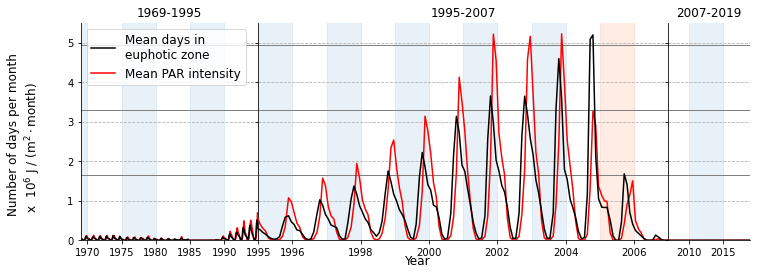

In [49]:
timeseries = np.concatenate((var_in_arrs_4['month_diff_time']+dt.timedelta(days=15),
                             var_in_arrs_3['month_diff_time'][:-1]+dt.timedelta(days=15),
                             var_in_arrs_1_2['month_diff_time']+dt.timedelta(days=15),
                             var_in_arrs_0['month_diff_time']+dt.timedelta(days=15)))

# Define the x ranges for each subplot
xlims = [(dt.datetime(1969,1,1), dt.datetime(1995,1,1)), (dt.datetime(1995,1,1), dt.datetime(2007,1,1)), (dt.datetime(2007,1,1), dt.datetime(2019,1,1))]

# Create a 3x1 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), gridspec_kw={"width_ratios": [1.3,3, 0.6], "height_ratios": [1],"wspace": 0.0})

# Loop over the subplots and plot the data
ii=0
for i, ax in enumerate(axs):
    
    ax.plot(timeseries, np.concatenate((var_in_arrs_4['month_diff'][::1], var_in_arrs_3['month_diff'][::1][:-1], var_in_arrs_1_2['month_diff'][::1],
                                        var_in_arrs_0['month_diff'])), 'k-',label='Mean days in \neuphotic zone',zorder=11)
    # For Joule plot
    Joule_coeff = 1.65
    ax.plot(timeseries, (Joule_coeff/1000000)*np.concatenate((var_in_arrs_4['Mean_Eup_CDW_monthly_sum_J'][::1],
                                                              var_in_arrs_3['Mean_Eup_CDW_monthly_sum_J'][::1][:-1], var_in_arrs_1_2['Mean_Eup_CDW_monthly_sum_J'][::1],
                                                              var_in_arrs_0['Mean_Eup_CDW_monthly_sum_J'])), '-',color='r',label='Mean PAR intensity',zorder=10)
    ax.plot([timeseries[0],timeseries[-1]],[Joule_coeff*1,Joule_coeff*1],'-',color='grey',linewidth=1)
    ax.plot([timeseries[0],timeseries[-1]],[Joule_coeff*2,Joule_coeff*2],'-',color='grey',linewidth=1)
    ax.plot([timeseries[0],timeseries[-1]],[Joule_coeff*3,Joule_coeff*3],'-',color='grey',linewidth=1)

    
    
    #ax.set_title(f"{xlims[i][0].year}-{xlims[i][1].year}",fontsize=12)
    
    ax.set_ylim([0,5.5])
    if exp_name=='MLS_OFF':
        ax.set_ylim([0,6.5])
    ax.grid(axis='y', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f"{xlims[i][0].year}-{xlims[i][1].year}",fontsize=12)
    if ii in [1,2]:
        ax.set_yticklabels([])
    if ii == 0:
        ax.legend(loc='upper left',fontsize=12)
    if ii ==1:
        #ax.plot([dt.datetime(2005, 1, 1),dt.datetime(2005, 1, 1)],[0,400],'-',color='orangered')
        #ax.plot([dt.datetime(2006, 1, 1),dt.datetime(2006, 1, 1)],[0,400],'-',color='orangered')
        # Plot the shaded range
        start_date,end_date = dt.datetime(1995, 1, 1),dt.datetime(2005, 1, 1)
        # Calculate the number of years between the start and end dates
        num_years = (end_date.year - start_date.year) + 1
        # Create the numpy array of dates
        dates_array = np.array([dt.datetime(year, 1, 1) for year in range(start_date.year, start_date.year + num_years, 1)], dtype='datetime64')
        for iii in [0,2,4,6,8]:
            ax.fill_between([dates_array[iii],dates_array[iii+1]], [0,0],[400,400], alpha=0.1,zorder=0,color='C0') 
        ax.fill_between([dt.datetime(2005, 1, 1),dt.datetime(2006, 1, 1)], [0,0],[400,400], alpha=0.1,zorder=0,color='orangered')
    if ii ==0:
        start_date,end_date = dt.datetime(1965, 1, 1),dt.datetime(1995, 1, 1)
        # Calculate the number of years between the start and end dates
        num_years = (end_date.year - start_date.year) + 1
        # Create the numpy array of dates
        dates_array = np.array([dt.datetime(year, 1, 1) for year in range(start_date.year, start_date.year + num_years, 5)], dtype='datetime64')
        for iii in [0,2,4]:
            ax.fill_between([dates_array[iii],dates_array[iii+1]], [0,0],[400,400], alpha=0.1,zorder=0,color='C0')
        # Generate the list of tick positions and tick labels
        tick_positions = [dt.datetime(1970,1,1),dt.datetime(1975,1,1),dt.datetime(1980,1,1),dt.datetime(1985,1,1),dt.datetime(1990,1,1),dt.datetime(1995,1,1)]
        tick_labels = [tick.strftime('%Y') for tick in tick_positions]
        # Assign the tick positions and labels to the x-axis
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)
    
    if ii==2:
        ax.fill_between([dt.datetime(2010, 1, 1),dt.datetime(2015, 1, 1)], [0,0],[400,400], alpha=0.1,zorder=0,color='C0')
        # Generate the list of tick positions and tick labels
        tick_positions = [dt.datetime(2010,1,1),dt.datetime(2015,1,1)]
        tick_labels = [tick.strftime('%Y') for tick in tick_positions]
        # Assign the tick positions and labels to the x-axis
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)
    ax.set_xlim(xlims[i])
    ii+=1
    
# Add overall title and axis labels
#fig.suptitle('Euphotic zone residence time increasing')
fig.text(0.5, 0.04, 'Year',fontsize=12)
fig.text(0.04, 0.5, 'Number of days per month \n x  10$^{6}$ J / (m$^{2}\cdot$month)', va='center', rotation='vertical',fontsize=12)
plt.savefig('Figure_4_a.png',dpi=500)
# Adjust spacing between subplots
#fig.subplots_adjust(0.1, right=1, bottom=0.15, top=0.85, wspace=0.03)